In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [12]:
sigmoid(1000)

1.0

In [13]:
sigmoid(-50)

1.928749847963918e-22

In [14]:
sigmoid(0)

0.5

In [17]:
x = np.arange(-10 , 10, 0.1)
y_ = sigmoid(x)

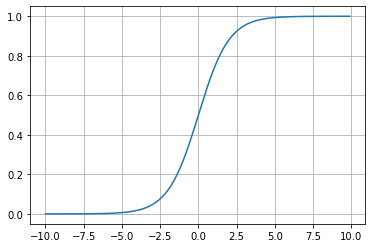

In [21]:
plt.plot(x,y_)
plt.grid('on')

#### Log Loss 

In [29]:
def logloss(y, y_hat):
    return -y * np.log(y_hat) - (1-y)* np.log(1 - y_hat)

In [31]:
y = 1 
y_hat = 0.99 
logloss(y, y_hat)

0.01005033585350145

In [32]:
y = 1 
y_hat = 0.999999 
logloss(y, y_hat)

1.000000500029089e-06

In [33]:
y = 1 
y_hat = 0.9
logloss(y, y_hat)

0.10536051565782628

In [34]:
y = 1 
y_hat = 0.8
logloss(y, y_hat)

0.2231435513142097

In [36]:
y = 1 
y_hat = 0.01
logloss(y, y_hat)

4.605170185988091

reverse - y lesser than y hat 

In [37]:
y = 0 
y_hat = 0.99
logloss(y, y_hat)

4.605170185988091

In [38]:
y = 0 
y_hat = 0.01
logloss(y, y_hat)

0.01005033585350145

### Gradients / Optimization 

In [43]:
#now the predict fuction 
def predict(X , W):

#     X : (n,d) input matrix 
#     W : (d,1) all the weights    
    z = np.dot(X, W)
    
    return sigmoid(z)

In [44]:
def error(X,y,W):
    
    y_hat = predict(X,W)
    err = np.mean(-y * np.log(y_hat) - (1-y)* np.log(1 - y_hat))
    
    return err

In [41]:
#implement the above formula 
def gradient(X,y,W):
    y_hat = predict(X,W)
    grad = np.dot(X.T , y_hat - y)
    
    return  2*grad/(len(X))

In [42]:
# #laslty the gradient descent 
def gradient_descent(X, Y, N_iter = 100, eta = 0.1):
    weights = np.random.randn(X.shape[1],1)
    error_list = []
    
    for i in range(N_iter):
        e = error(X, Y, weights)
        error_list.append(e)

        grad = gradient(X, Y, weights)
        weights = weights - eta*grad 
        
    return weights.round(2), error_list

